# Notebook A: Experimental Growth Parameter Calculations

This Jupyter notebook is dedicated to the analysis and calculation of growth parameters for the olegenous yeast, <i>Y. lipolytica</i>, when grown with glucose, glycerol and oleic acid. 

### Objective
The objective of this analysis is to provide a clear and quantifiable understanding of the how of the growth rates, yield coefficients, and substrate uptake rates were calculated. This is crucial for providing constraints for the later genome scale model analysis.

### Important Functions
`get_average_growth_parameters`
This function computes the average growth parameters across multiple trials. This function leverages the get_trial_growth_parameters function for each trial and then averages the results.

`get_trial_growth_parameters`
This function calculates growth parameters for a single trial. It computes the growth rate, yield coefficient, and substrate uptake rate for a given trial number.

### A note about oleic acid yield
Oleic acid yield was calculated to be 0.302 ± 0.070 g biomass / mmol oleic acid using a colony forming unit approach (CFU).

### Load imports

In [1]:
import pandas as pd
import math
import sys

source_dir = '../src'
sys.path.append(source_dir)

from growth_parameters.get_average_growth_parameters import get_average_growth_parameters

### Load glucose growth curve data

In [2]:
# load glucose growth data
glucose_growth_df = pd.read_csv('../data/growth_curves/glucose_growth_data.csv')

glucose_growth_df

,time_h,glucose_g/l_1,glucose_g/l_2,glucose_g/l_3,yarrowia_OD_1,yarrowia_OD_2,yarrowia_OD_3
0,0,1.680009,1.712100,1.908116,0.0788,0.0788,0.0788
1,5,1.752865,1.983573,1.939340,0.1621,0.1652,0.1589
2,8,1.220327,1.311396,1.222061,0.4818,0.4578,0.5407
3,11,1.091963,1.187368,0.882937,1.2770,1.3020,1.2850
4,15,0.058111,0.051172,0.047703,3.3720,3.6810,3.8010


### Get glucose growth parameters

not oleic acid
[0.023372079999999996, 0.08672611223116142, 0.19046772155872252, 0.41830484524747424, 1.1941390656486082]
Trial 1:
growth_rate = 0.262 hr-1
yield coefficient = 0.108 g biomass/mmol glucose
substrate consumption rate = 2.417 mmol glucose/gram biomass * hr

not oleic acid
[0.023372079999999996, 0.08884027336144716, 0.19795086297376407, 0.4410673523328251, 1.2836154336930874]
Trial 2:
growth_rate = 0.267 hr-1
yield coefficient = 0.116 g biomass/mmol glucose
substrate consumption rate = 2.304 mmol glucose/gram biomass * hr

not oleic acid
[0.023372079999999996, 0.08997175183424243, 0.20200004406331273, 0.45352032131990394, 1.3332874822010312]
Trial 3:
growth_rate = 0.270 hr-1
yield coefficient = 0.107 g biomass/mmol glucose
substrate consumption rate = 2.522 mmol glucose/gram biomass * hr

Average Growth Parameters:
growth_rate = 0.266 ± 0.003 hr-1
yield coefficient = 0.110 ± 0.004 g biomass/mmol glucose
substrate consumption rate = 2.414 ± 0.089 mmol glucose/gram biomass * 

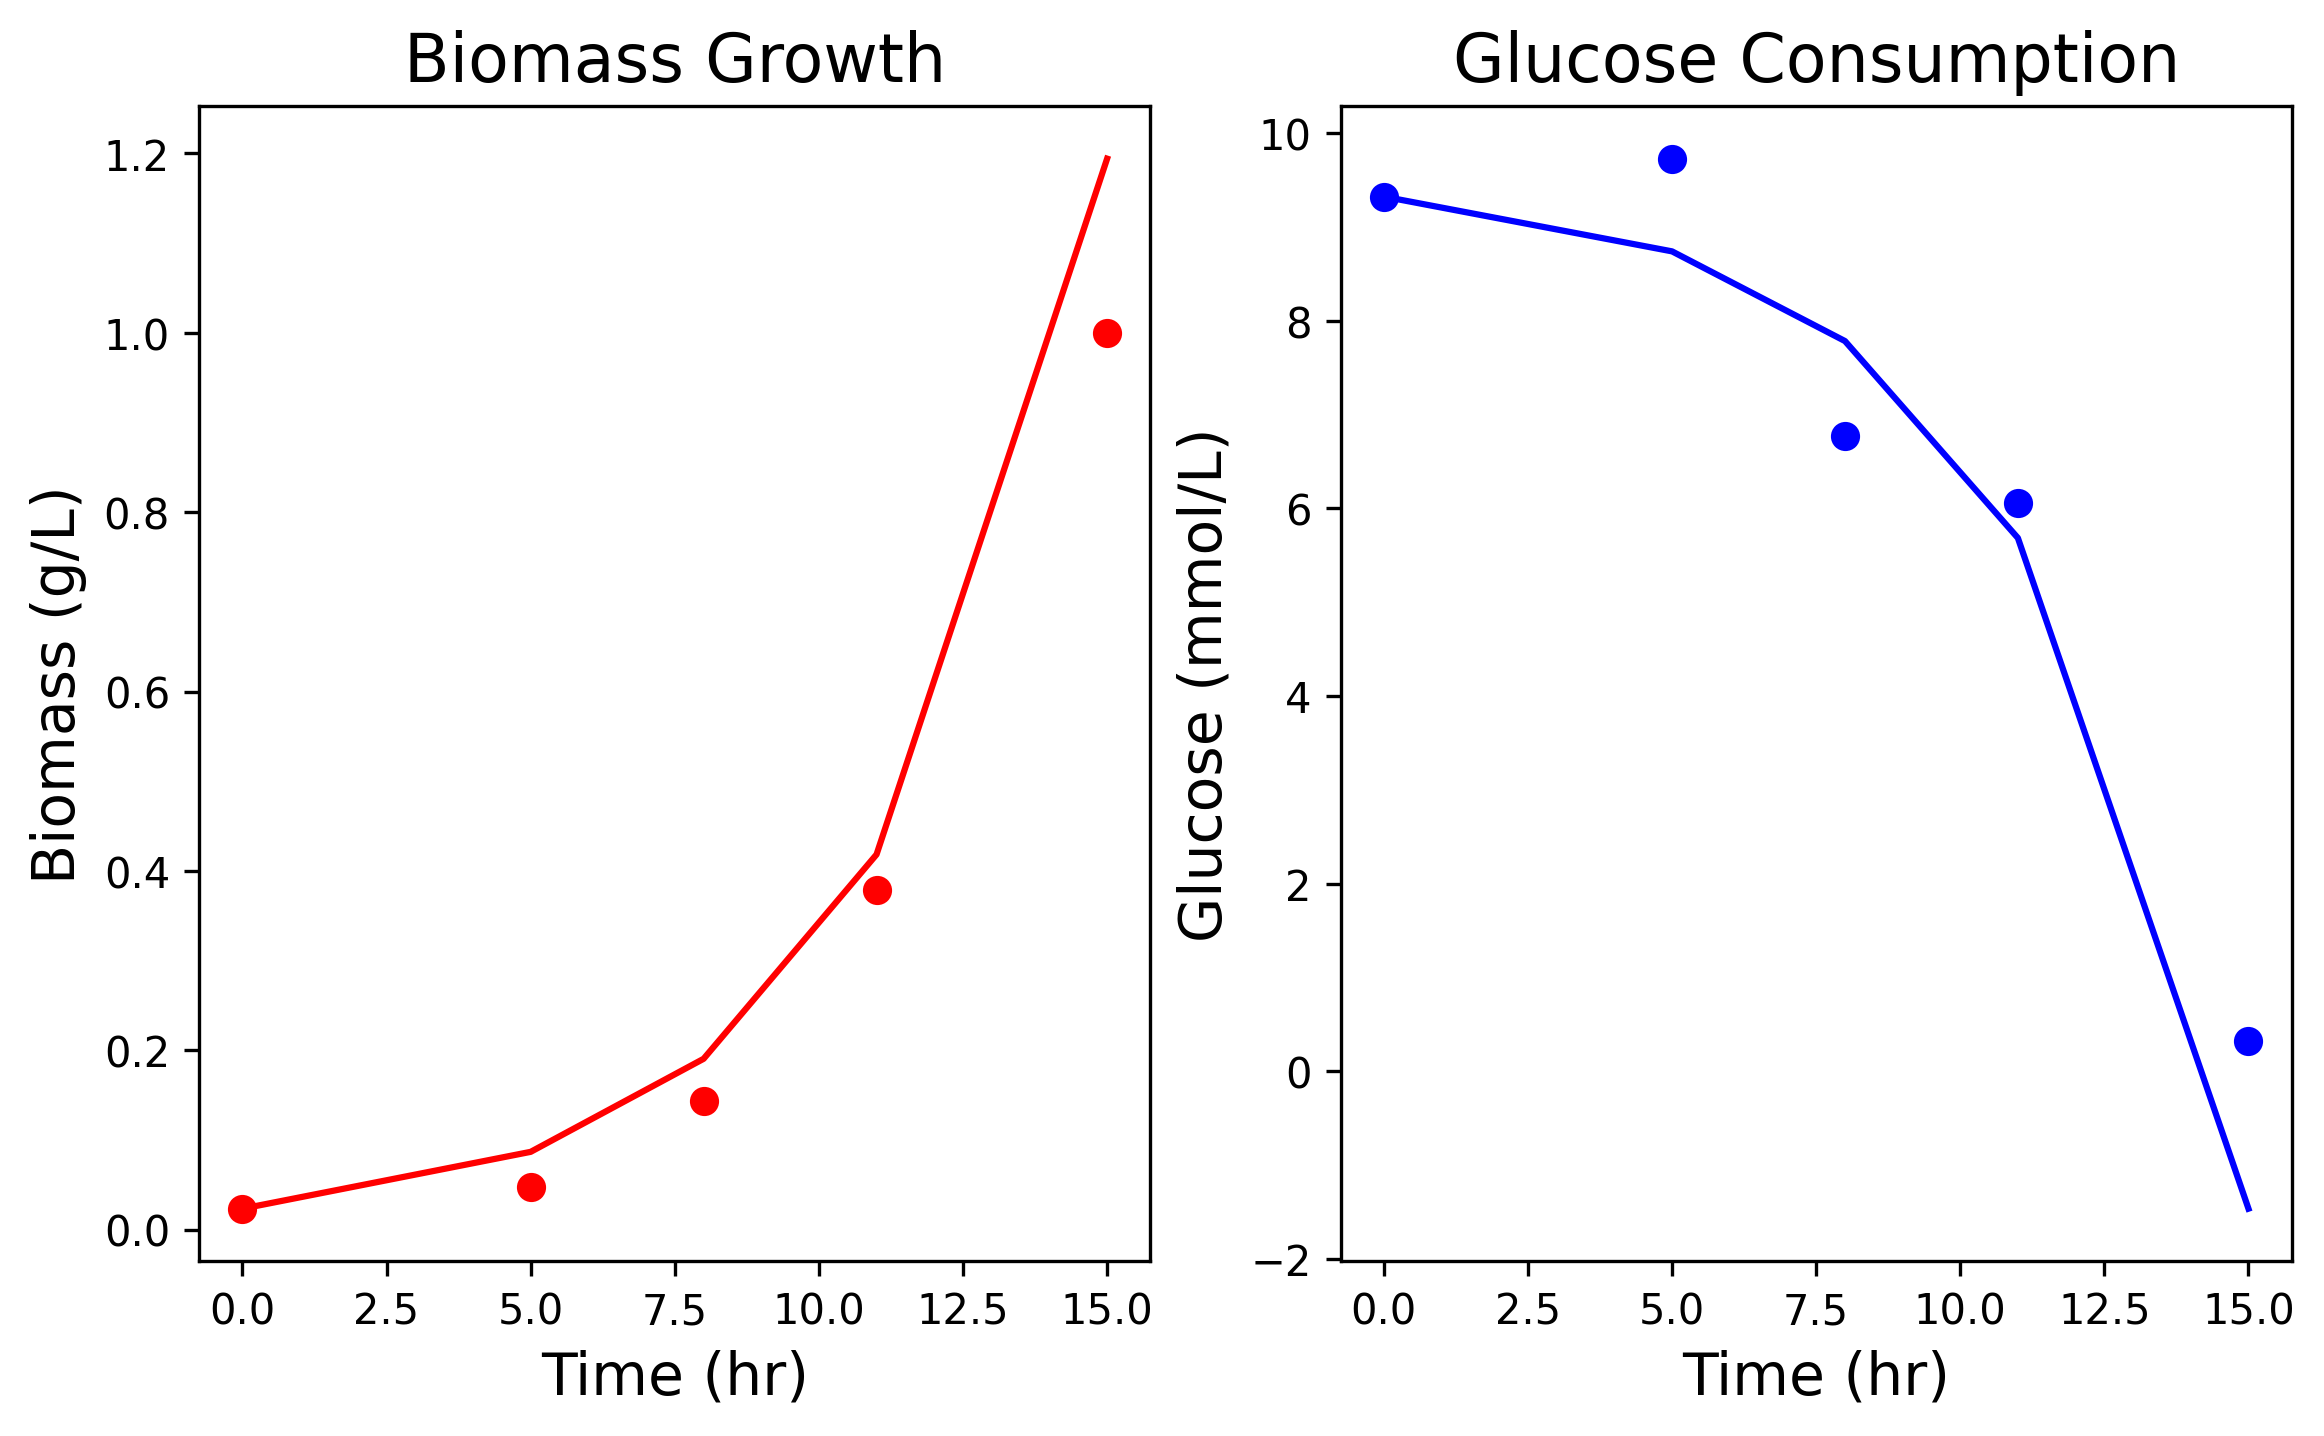

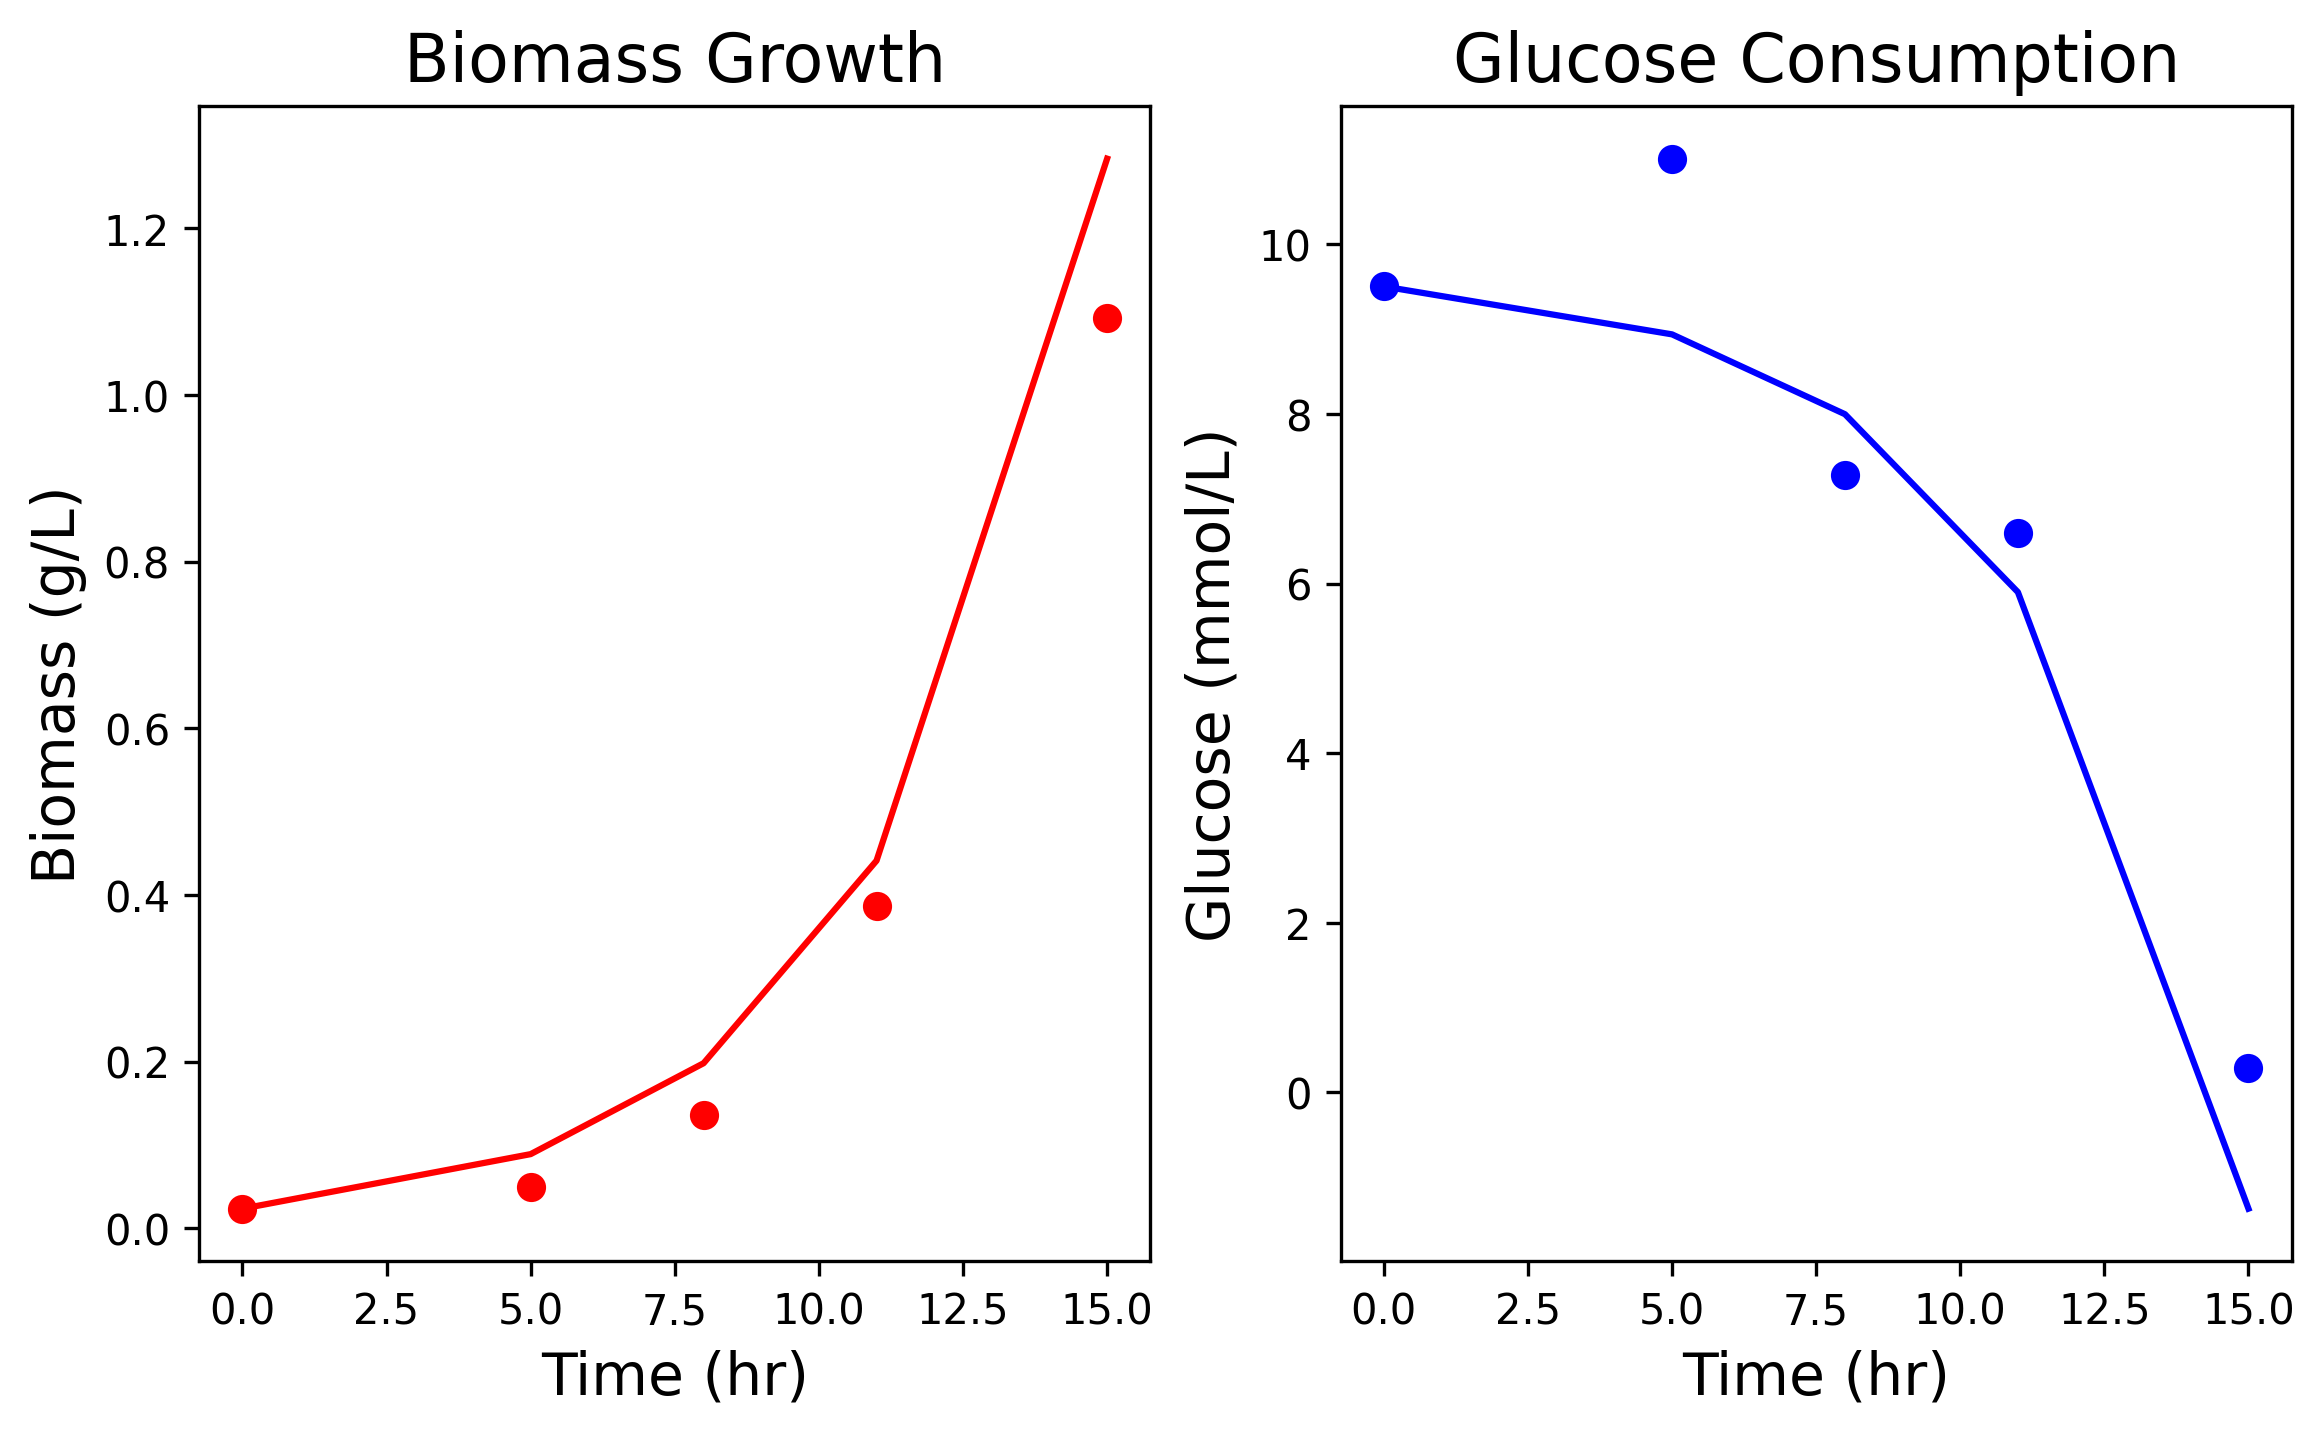

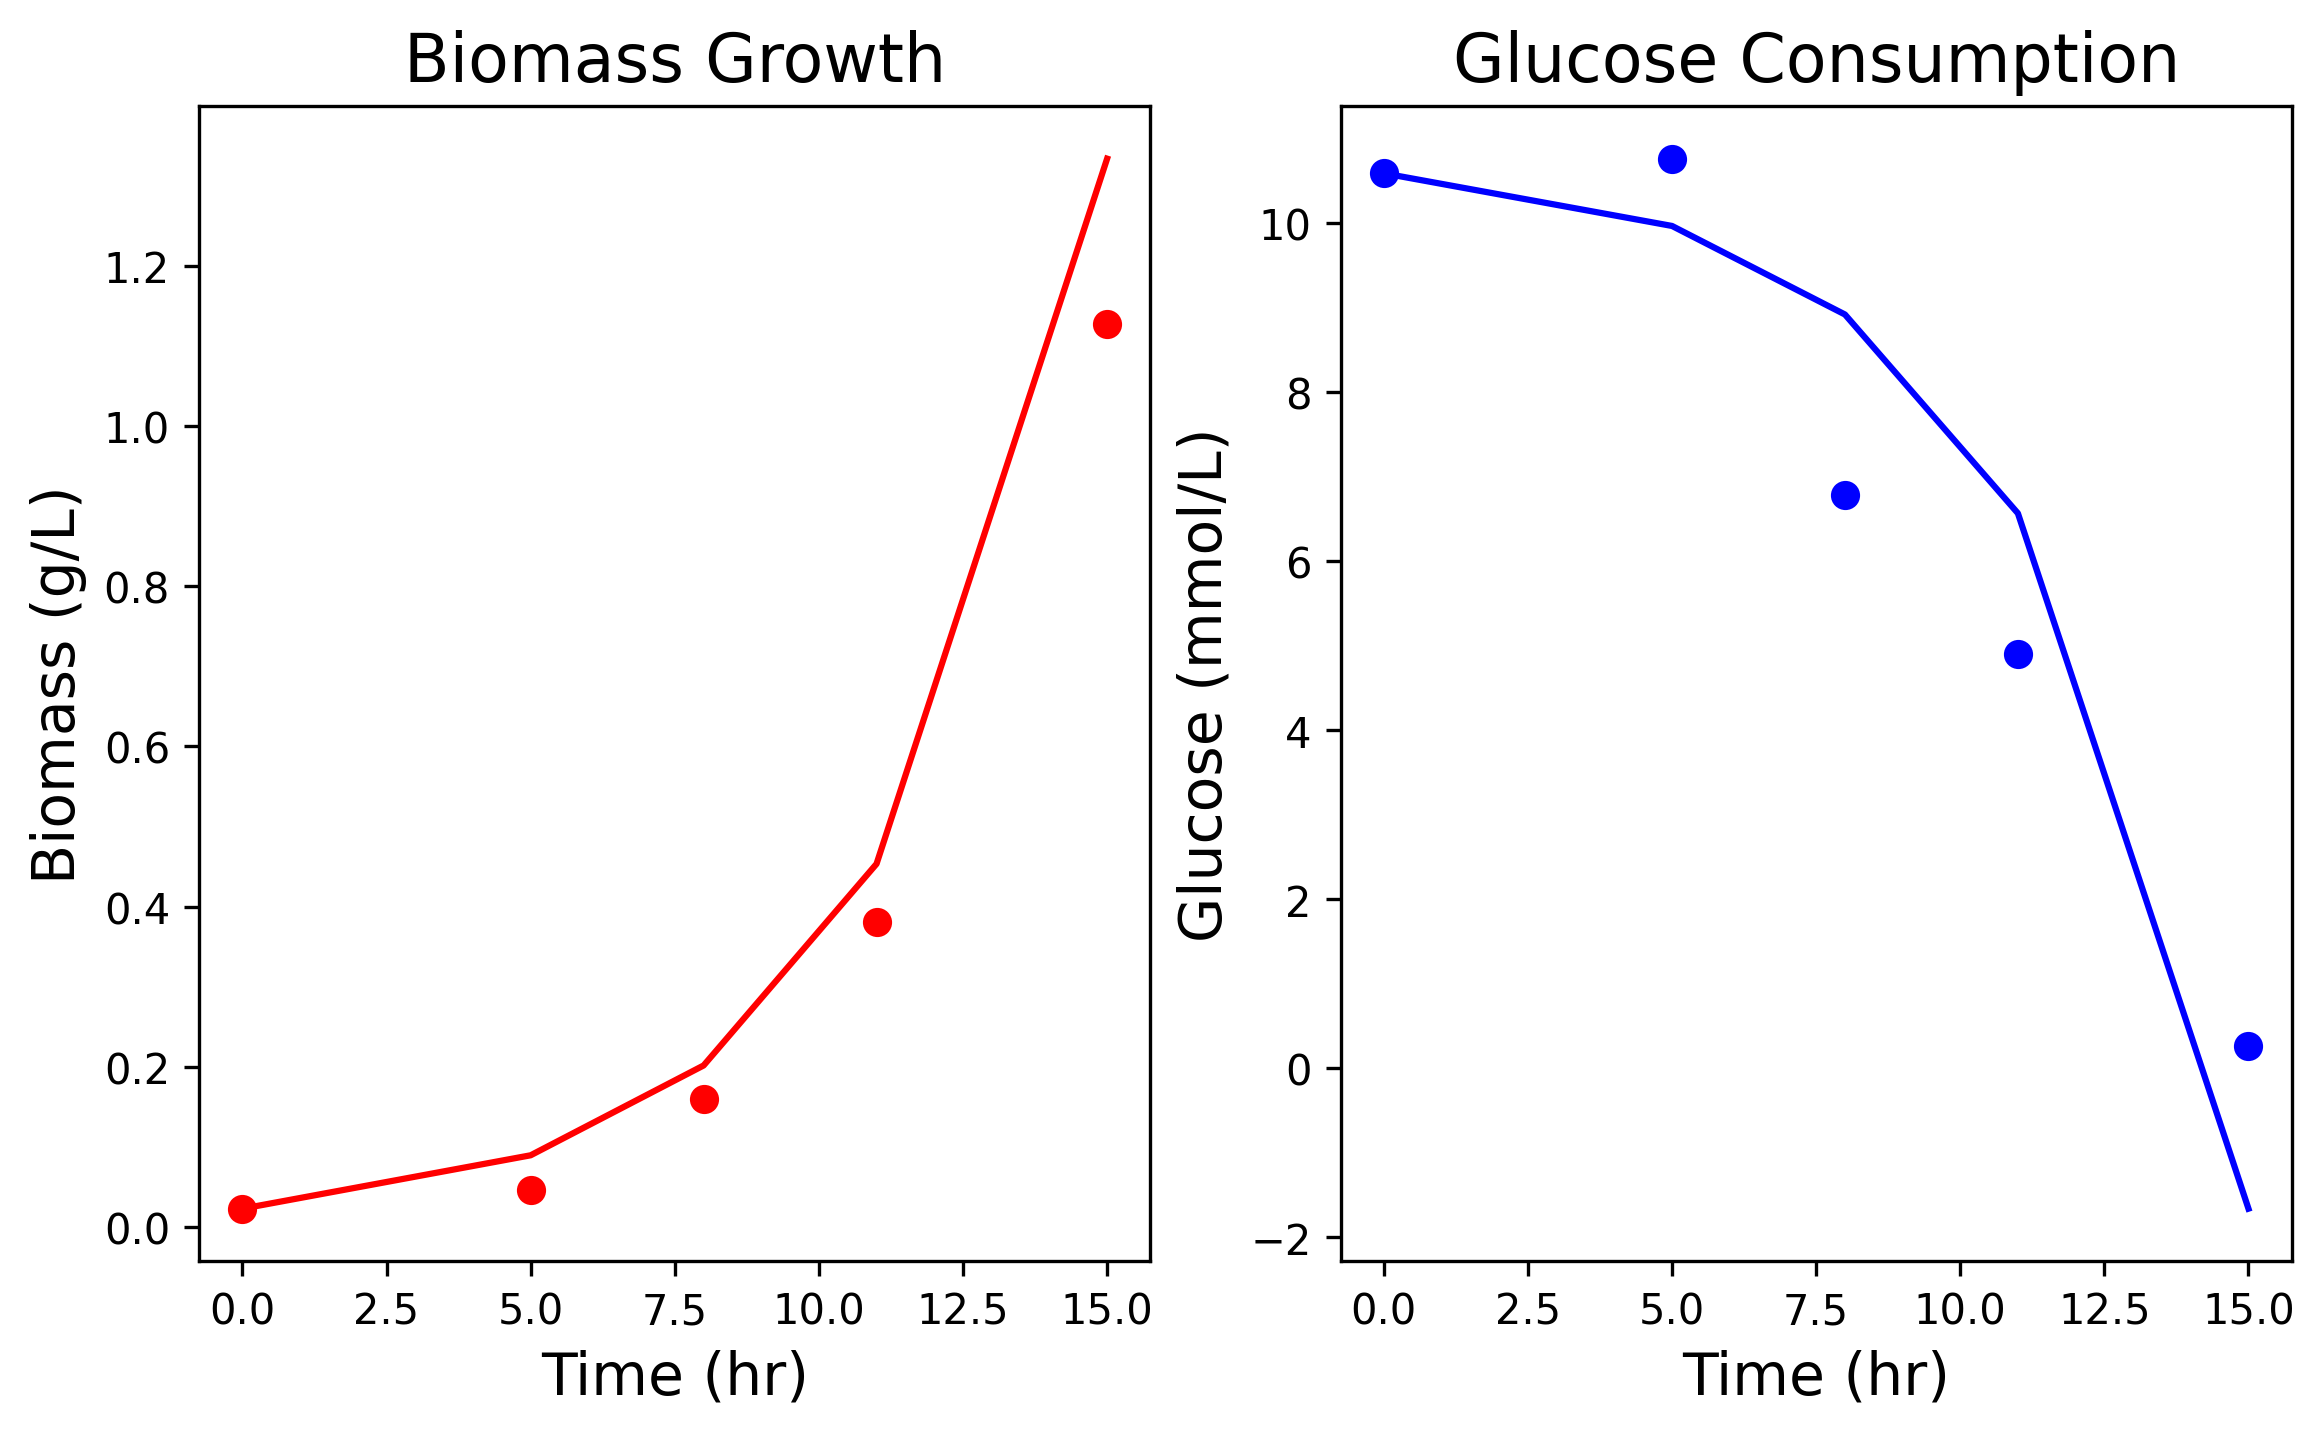

In [3]:
glucose_growth_parameters = get_average_growth_parameters(growth_df=glucose_growth_df, substrate='glucose', molar_mass=180.16)

### Load glycerol data

In [4]:
# load glycerol growth data
glycerol_growth_df = pd.read_csv('../data/growth_curves/glycerol_growth_data.csv')

glycerol_growth_df

,time_h,glycerol_g/l_1,glycerol_g/l_2,glycerol_g/l_3,yarrowia_OD_1,yarrowia_OD_2,yarrowia_OD_3
0,0,1.389,1.812,1.998,0.0785,0.0785,0.0785
1,5,2.678,1.736,2.263,0.2847,0.3147,0.2809
2,8,1.792,1.626,1.553,1.3272,1.4934,1.3482
3,11,0.038,0.022,0.008,3.6400,3.6300,3.6945


### Calculate glycerol parameters

not oleic acid
[0.023283099999999998, 0.13863477647140401, 0.40436263354359164, 1.1794236883992506]
Trial 1:
growth_rate = 0.357 hr-1
yield coefficient = 0.072 g biomass/mmol glycerol
substrate consumption rate = 4.956 mmol glycerol/gram biomass * hr

not oleic acid
[0.023283099999999998, 0.13992234380739565, 0.4103881689274488, 1.2036565755891977]
Trial 2:
growth_rate = 0.359 hr-1
yield coefficient = 0.054 g biomass/mmol glycerol
substrate consumption rate = 6.618 mmol glycerol/gram biomass * hr

not oleic acid
[0.023283099999999998, 0.13989175402630247, 0.4102446280399499, 1.20307773683353]
Trial 3:
growth_rate = 0.359 hr-1
yield coefficient = 0.050 g biomass/mmol glycerol
substrate consumption rate = 7.226 mmol glycerol/gram biomass * hr

Average Growth Parameters:
growth_rate = 0.358 ± 0.001 hr-1
yield coefficient = 0.059 ± 0.010 g biomass/mmol glycerol
substrate consumption rate = 6.267 ± 0.960 mmol glycerol/gram biomass * hr


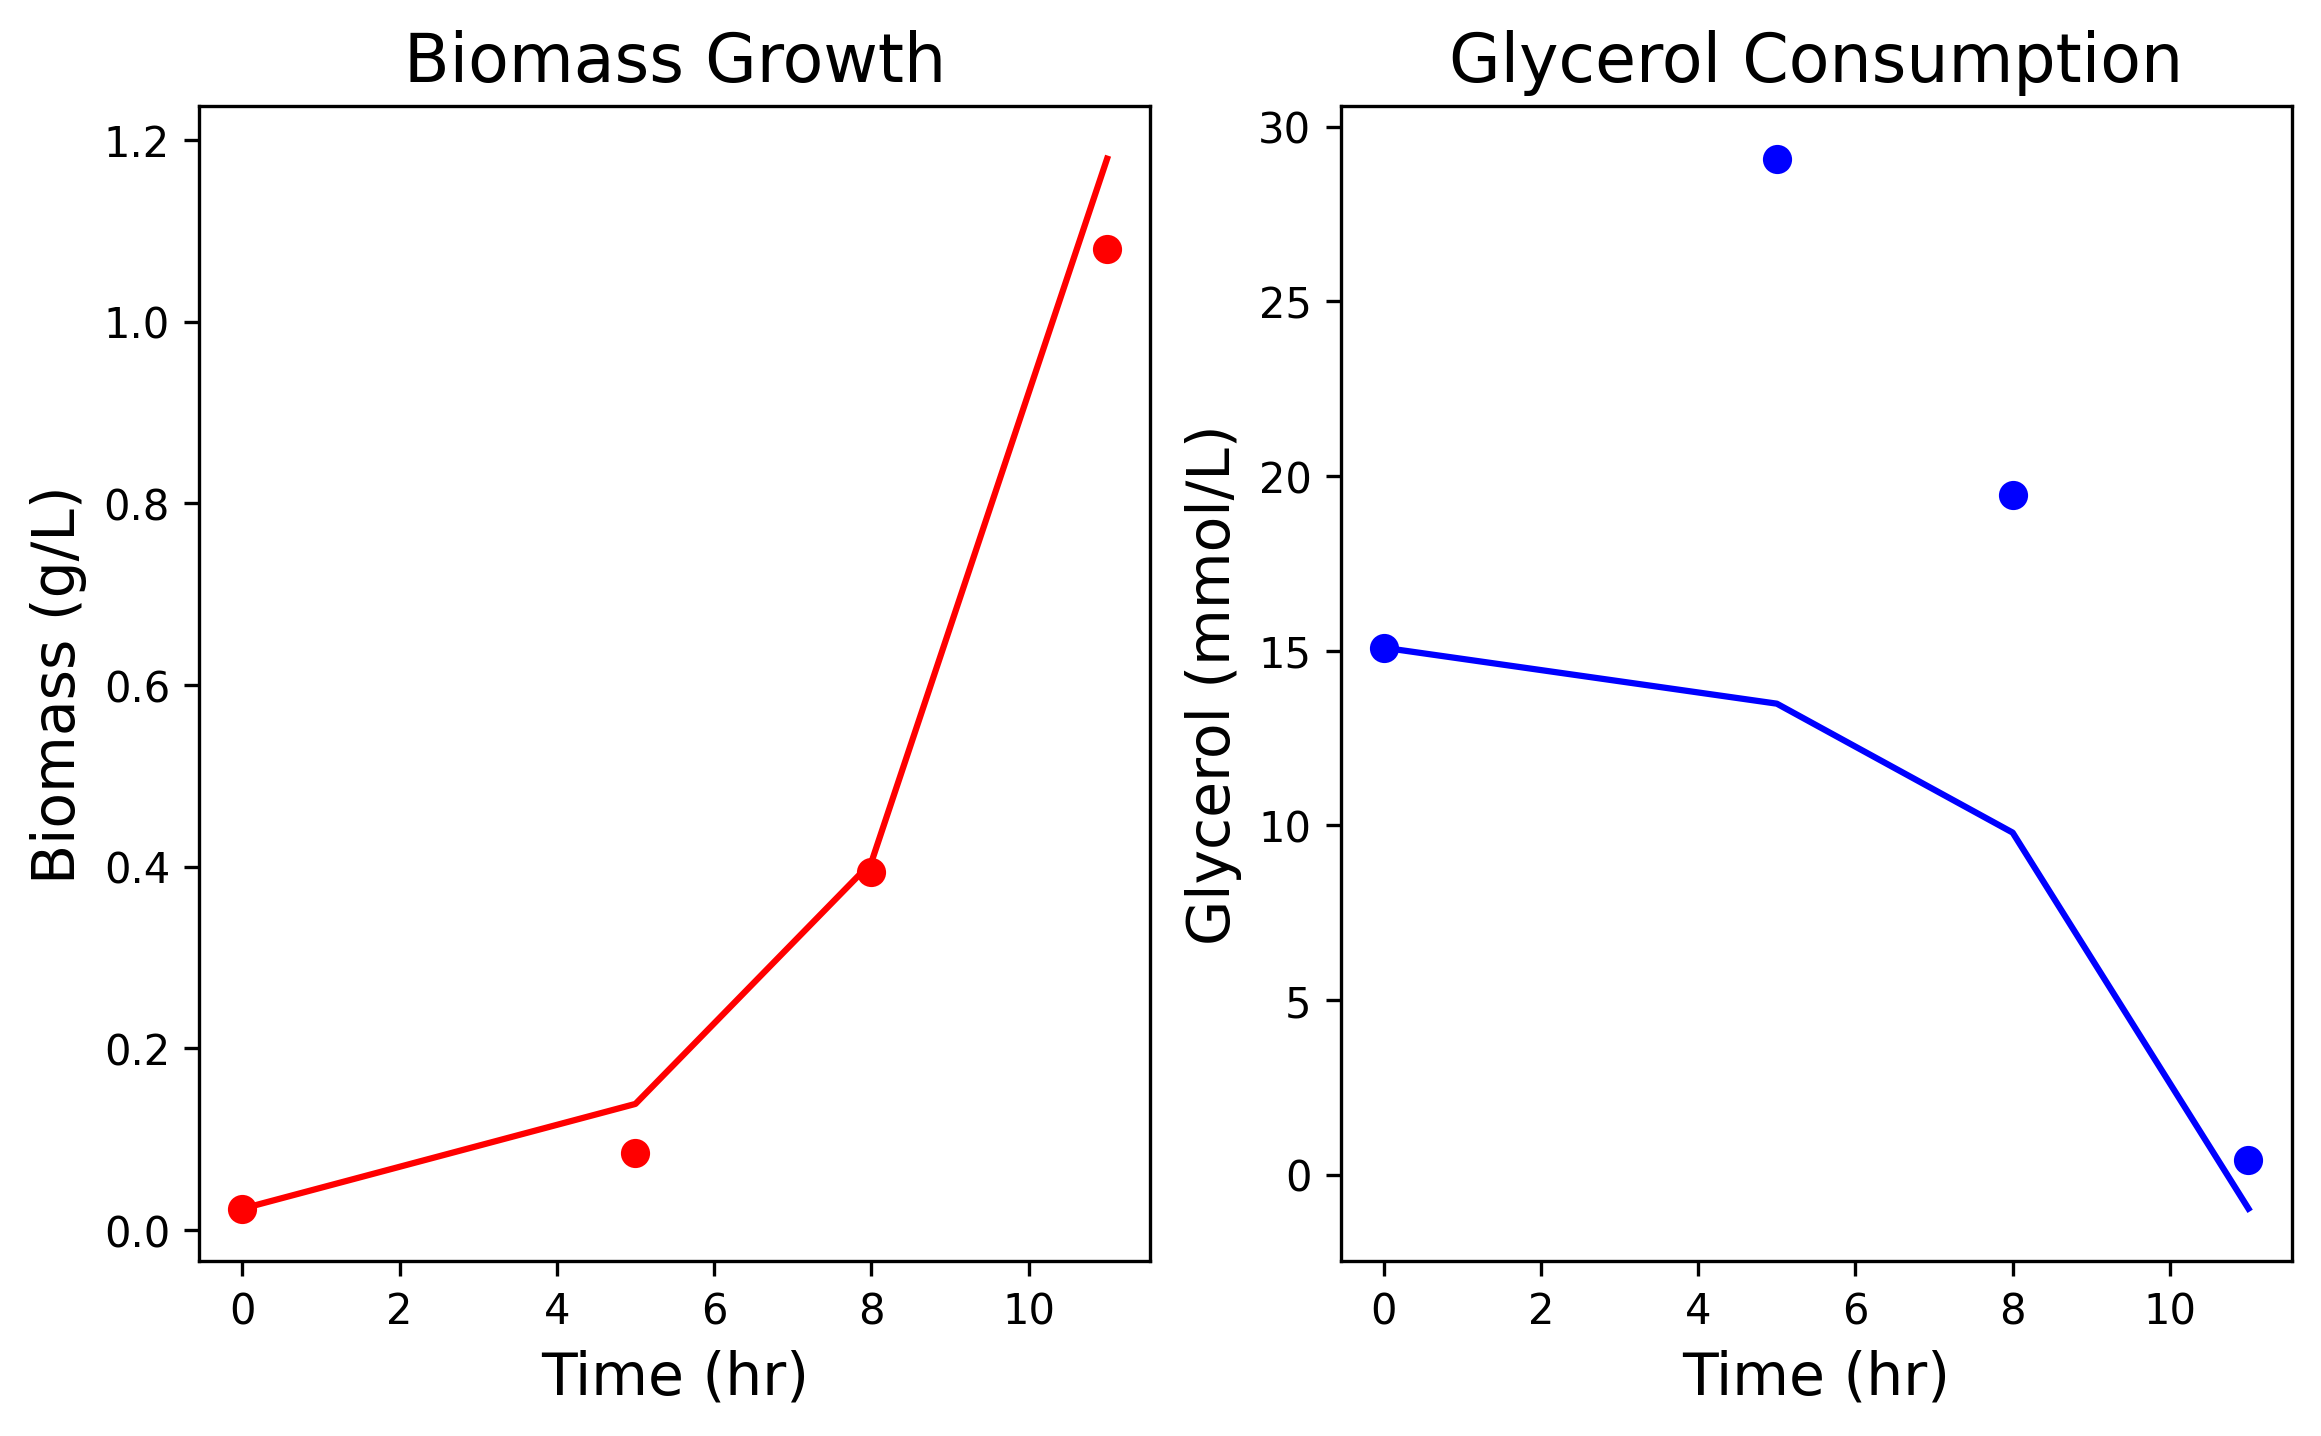

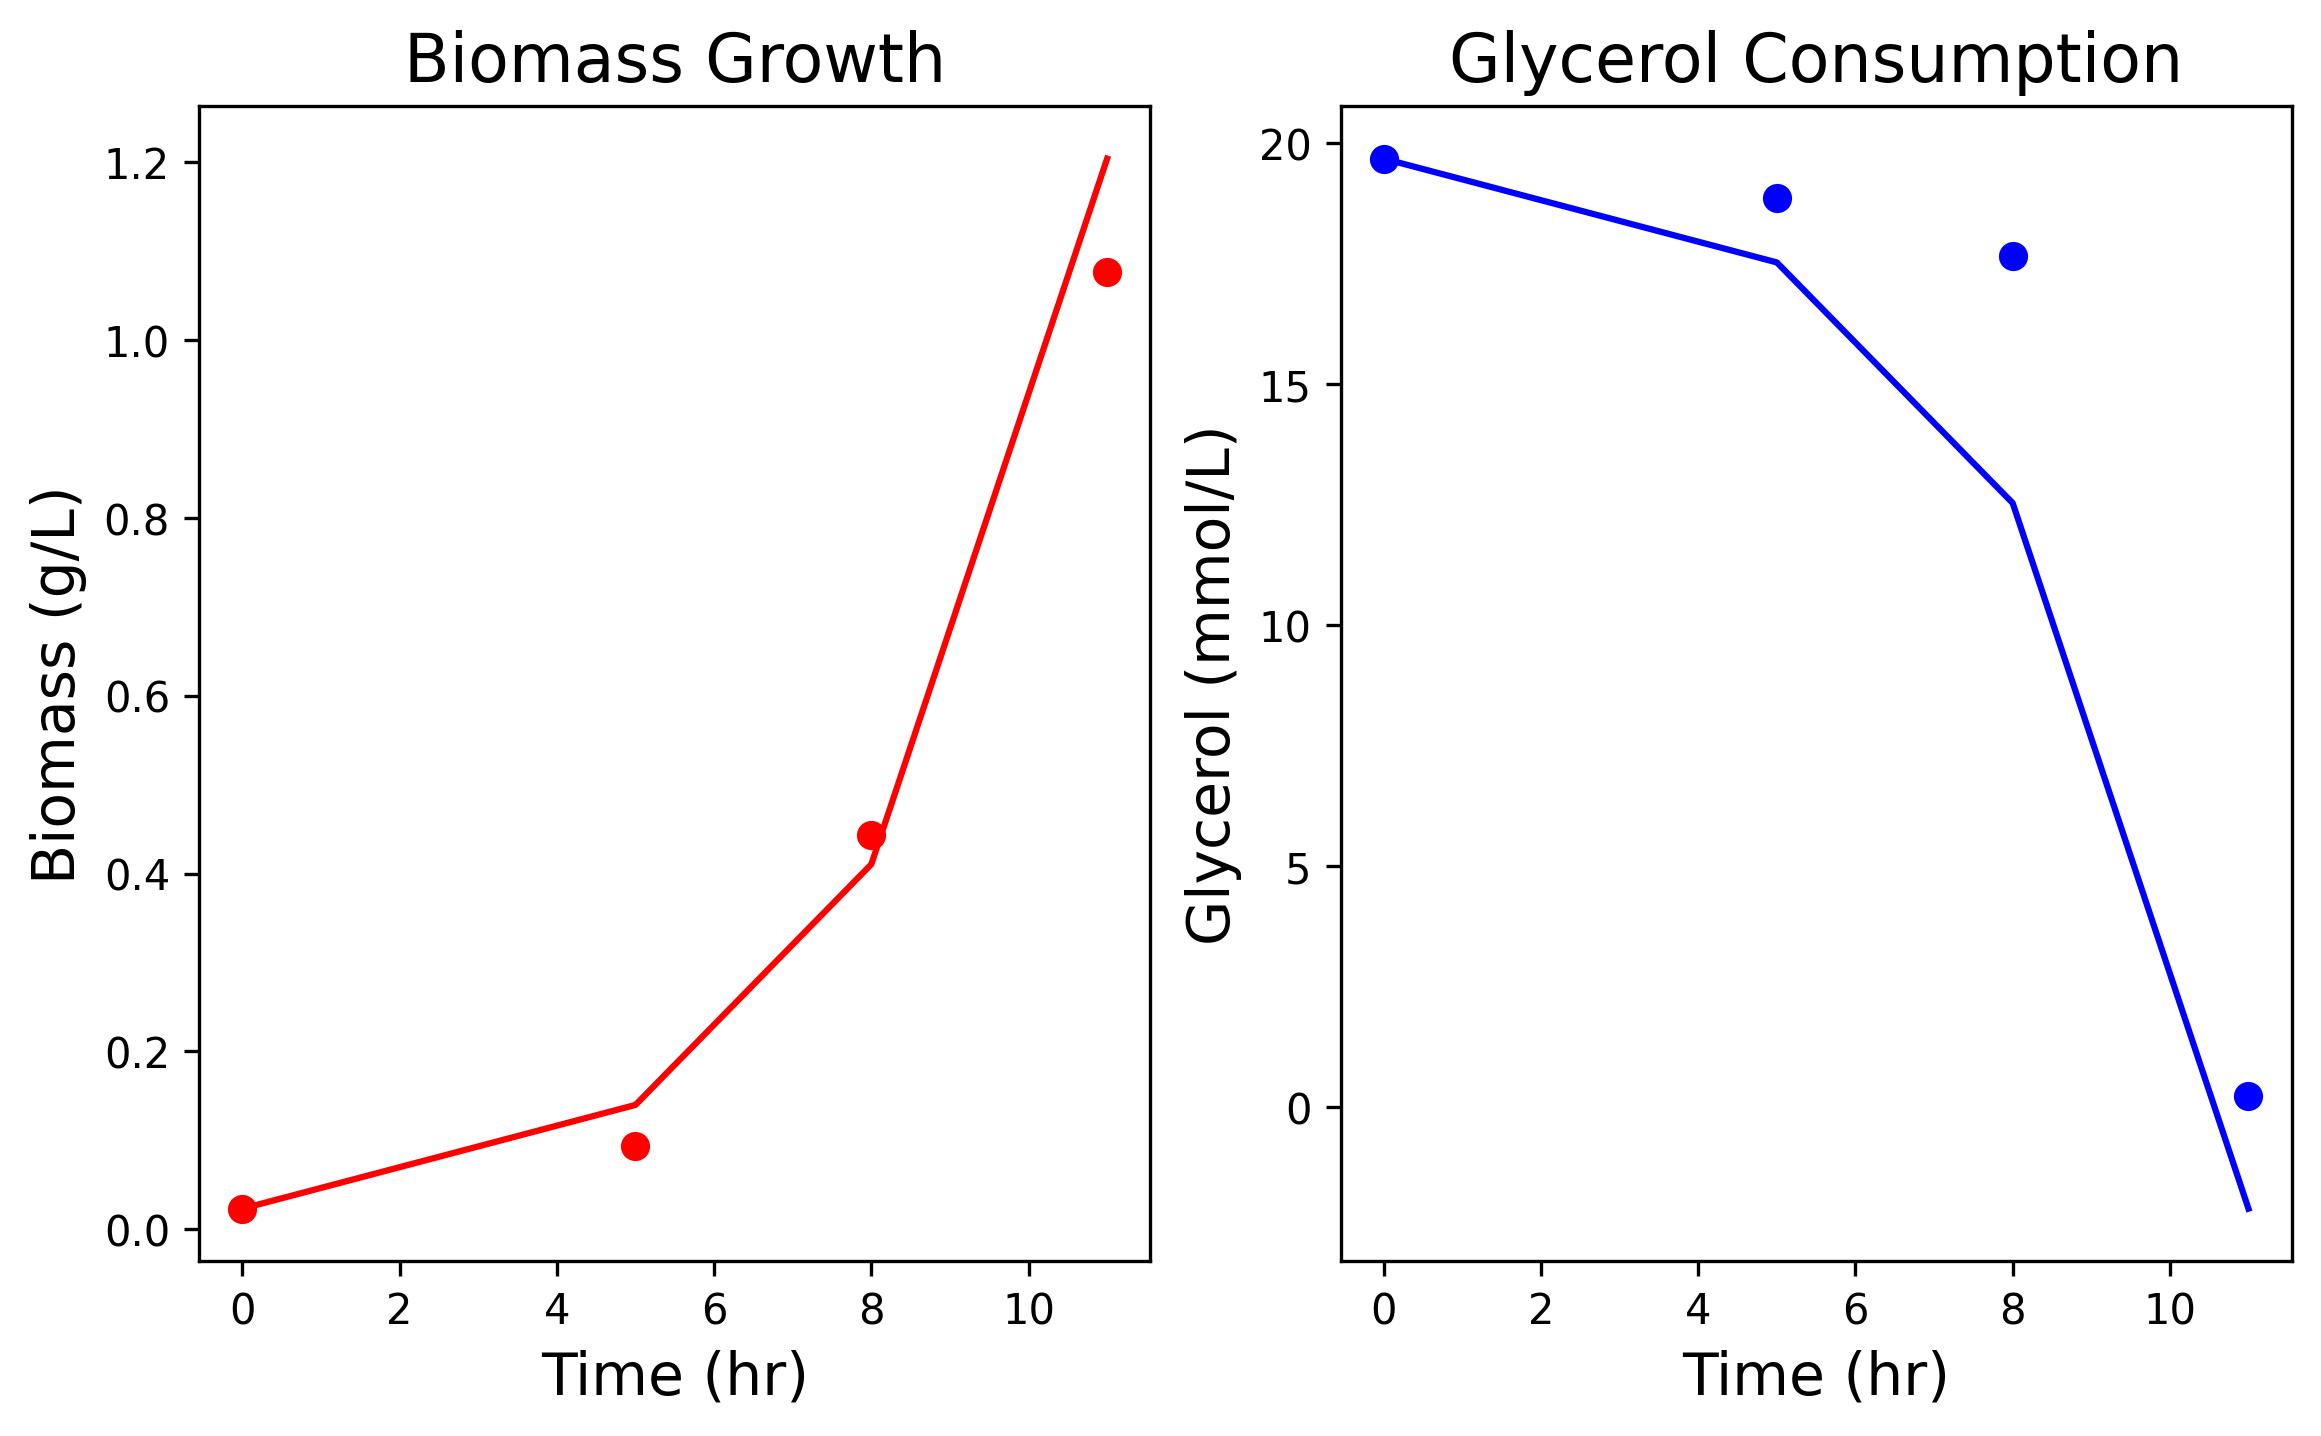

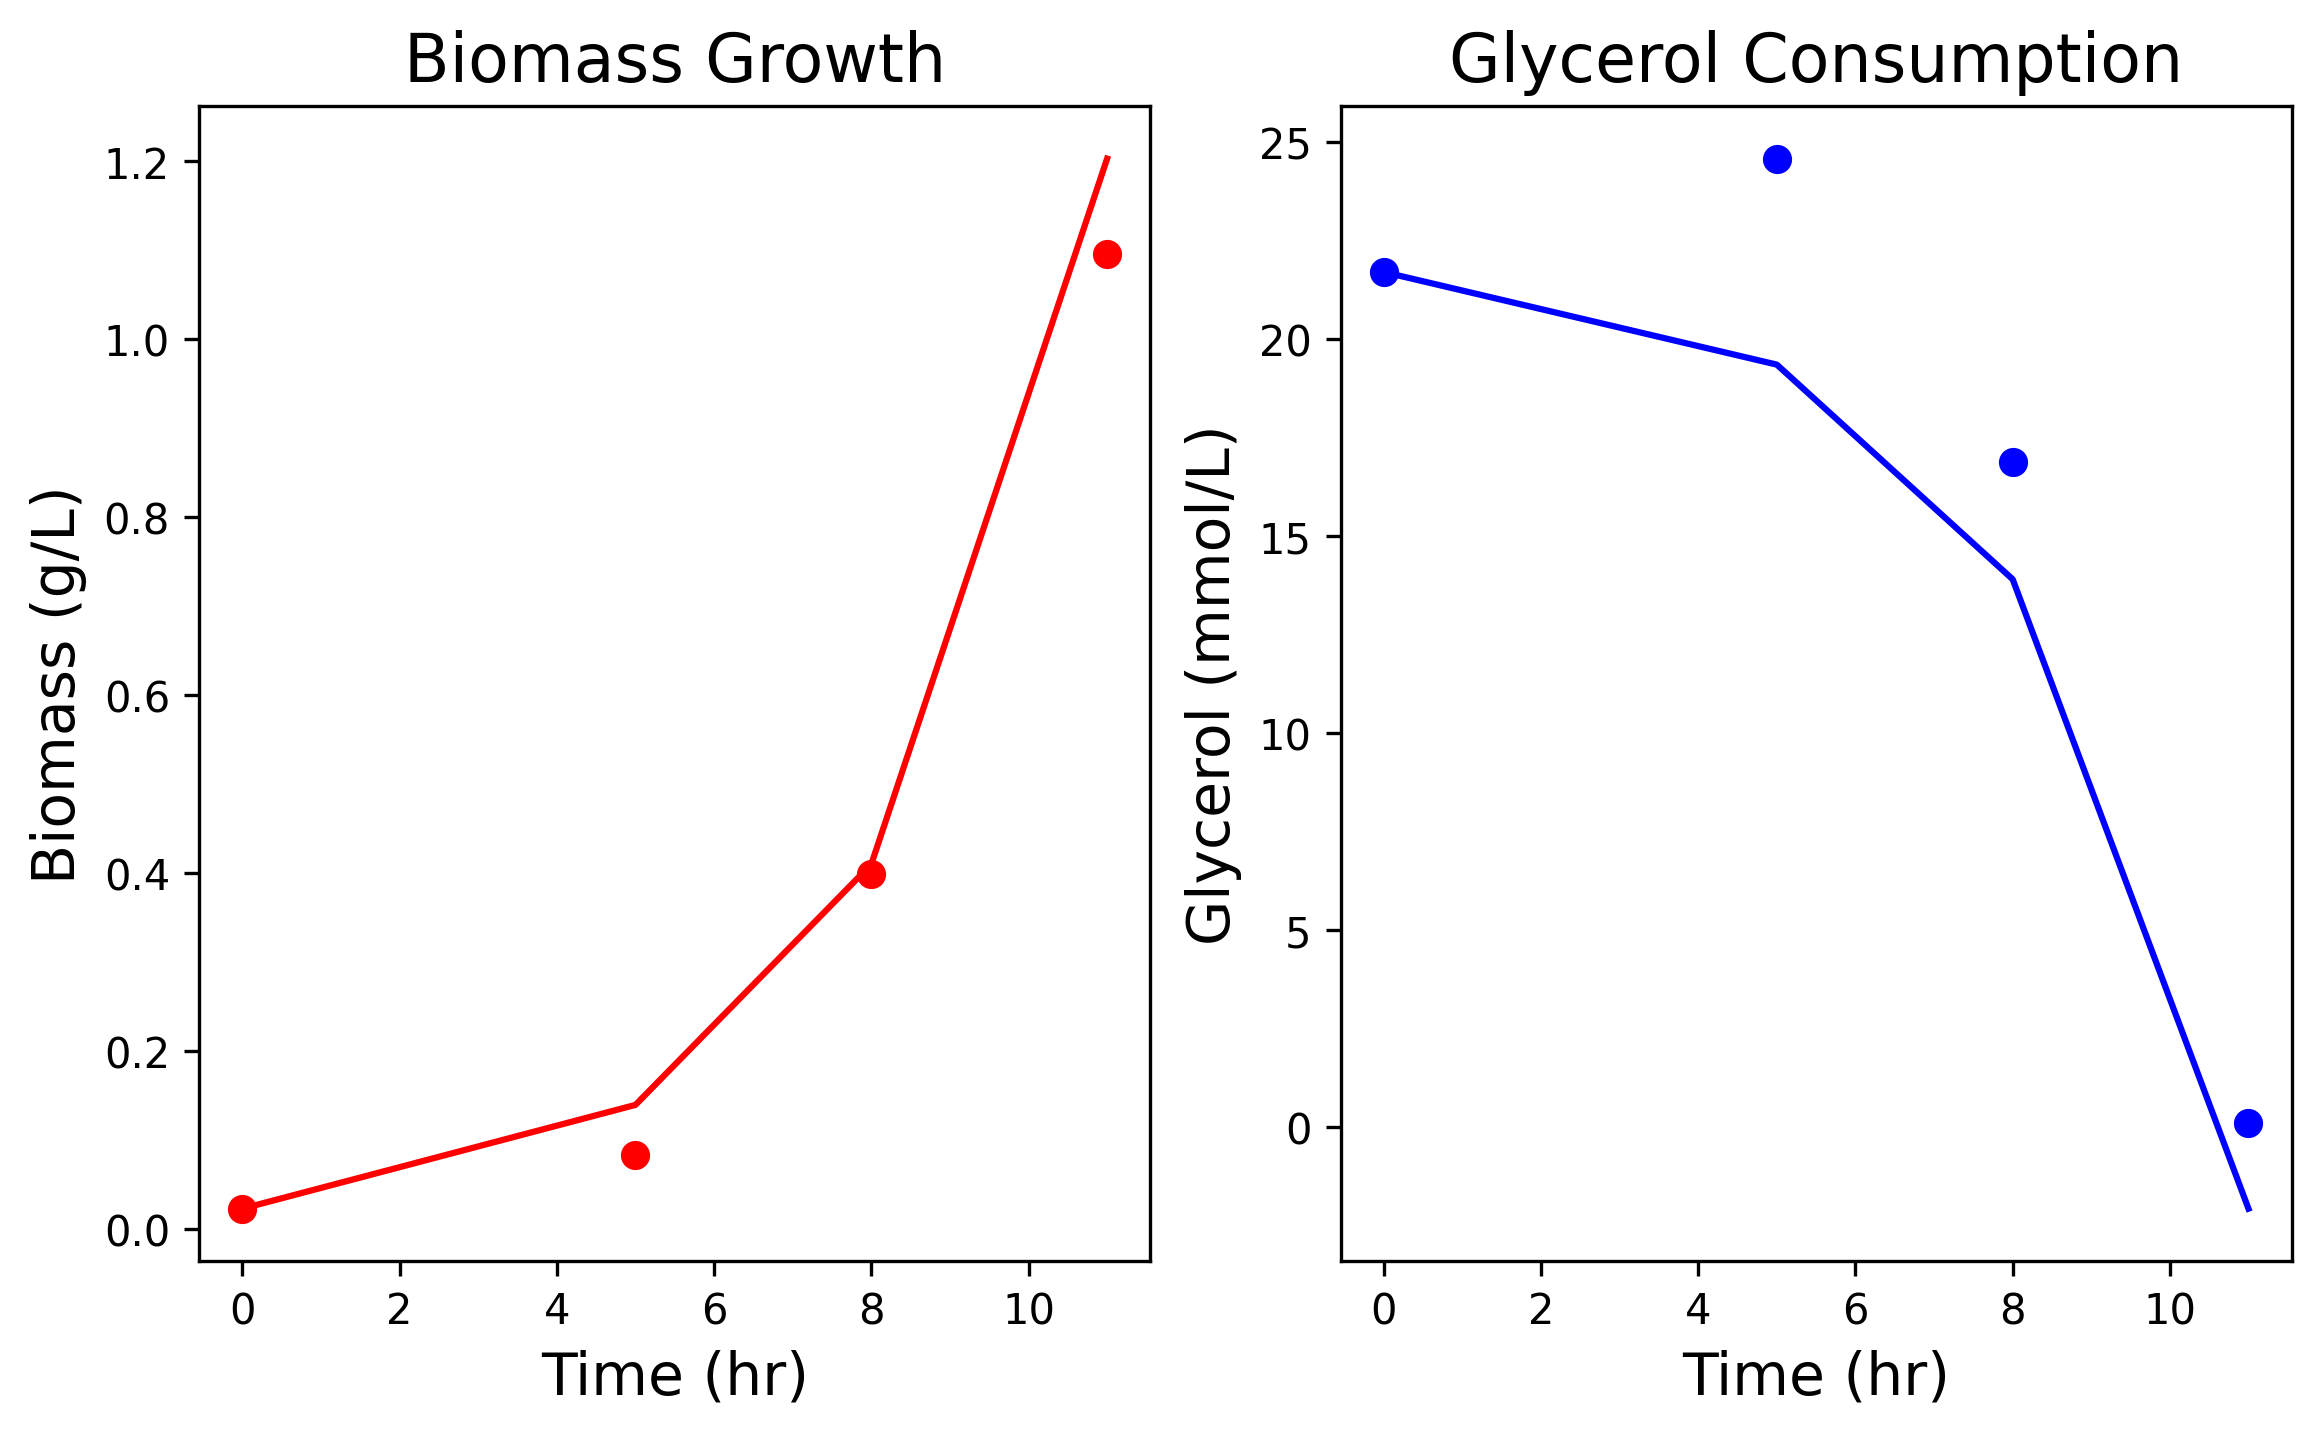

In [5]:
glycerol_growth_parameters = get_average_growth_parameters(growth_df=glycerol_growth_df, substrate='glycerol', molar_mass=92.09)

### Load oleic acid growth curve data

In [6]:
# load oleic acid growth data
oleic_acid_growth_df = pd.read_csv('../data/growth_curves/oleic_acid_growth_data.csv')

oleic_acid_growth_df

,time_h,oleic_acid_g/l_1,oleic_acid_g/l_2,oleic_acid_g/l_3,yarrowia_OD_1,yarrowia_OD_2,yarrowia_OD_3
0,0.00,NaN,NaN,NaN,0.050,0.050,0.050
1,4.25,NaN,NaN,NaN,0.189,0.184,0.224
2,7.67,NaN,NaN,NaN,0.412,0.420,0.468
3,10.08,NaN,NaN,NaN,0.602,0.742,1.132
4,12.66,NaN,NaN,NaN,1.202,1.492,1.504


### Get oleic acid growth parameters

oleic acid
[0.01483, 0.041831618101543004, 0.09636400290742997, 0.17349918372387893, 0.32560763524597325]
Trial 1:
growth_rate = 0.244 hr-1
yield coefficient = 0.302 g biomass/mmol oleic_acid
substrate consumption rate = 0.808 mmol oleic_acid/gram biomass * hr

oleic acid
[0.01483, 0.04556660163692509, 0.11244630130100151, 0.21251493855499953, 0.4200819027869513]
Trial 2:
growth_rate = 0.264 hr-1
yield coefficient = 0.302 g biomass/mmol oleic_acid
substrate consumption rate = 0.875 mmol oleic_acid/gram biomass * hr

oleic acid
[0.01483, 0.04742765148537141, 0.12087039742332006, 0.23368053881028544, 0.4732828410847569]
Trial 3:
growth_rate = 0.274 hr-1
yield coefficient = 0.302 g biomass/mmol oleic_acid
substrate consumption rate = 0.906 mmol oleic_acid/gram biomass * hr

Average Growth Parameters:
growth_rate = 0.261 ± 0.012 hr-1
yield coefficient = 0.302 ± 0.000 g biomass/mmol oleic_acid
substrate consumption rate = 0.863 ± 0.041 mmol oleic_acid/gram biomass * hr


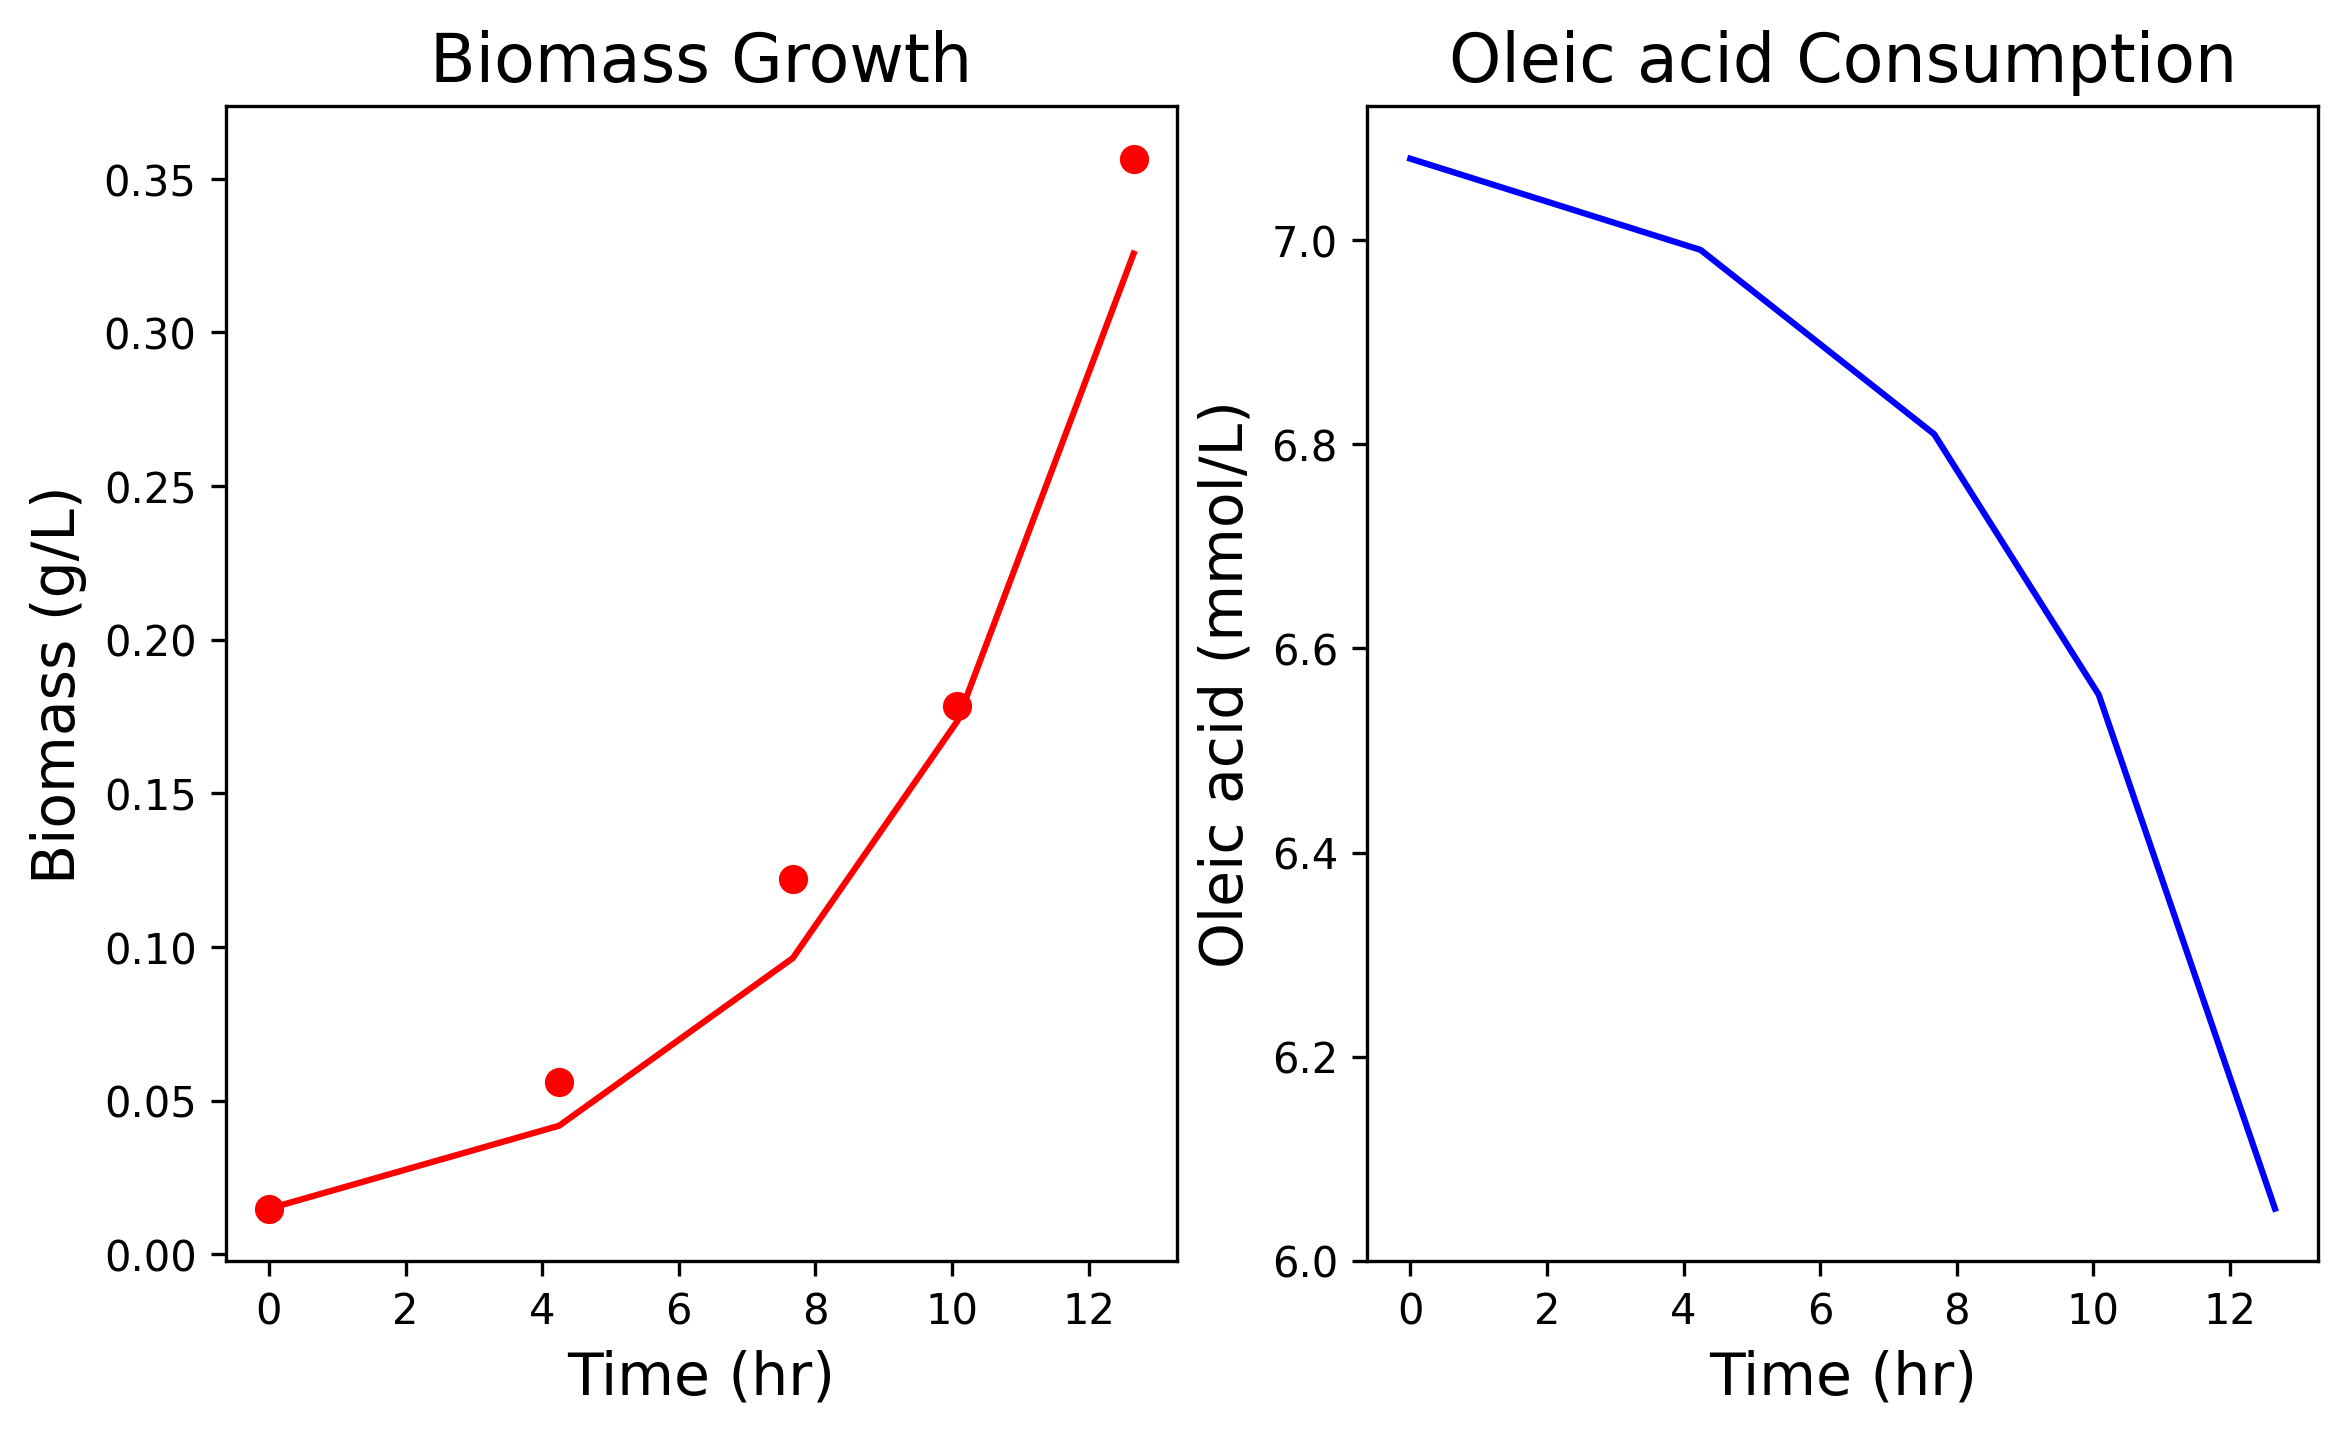

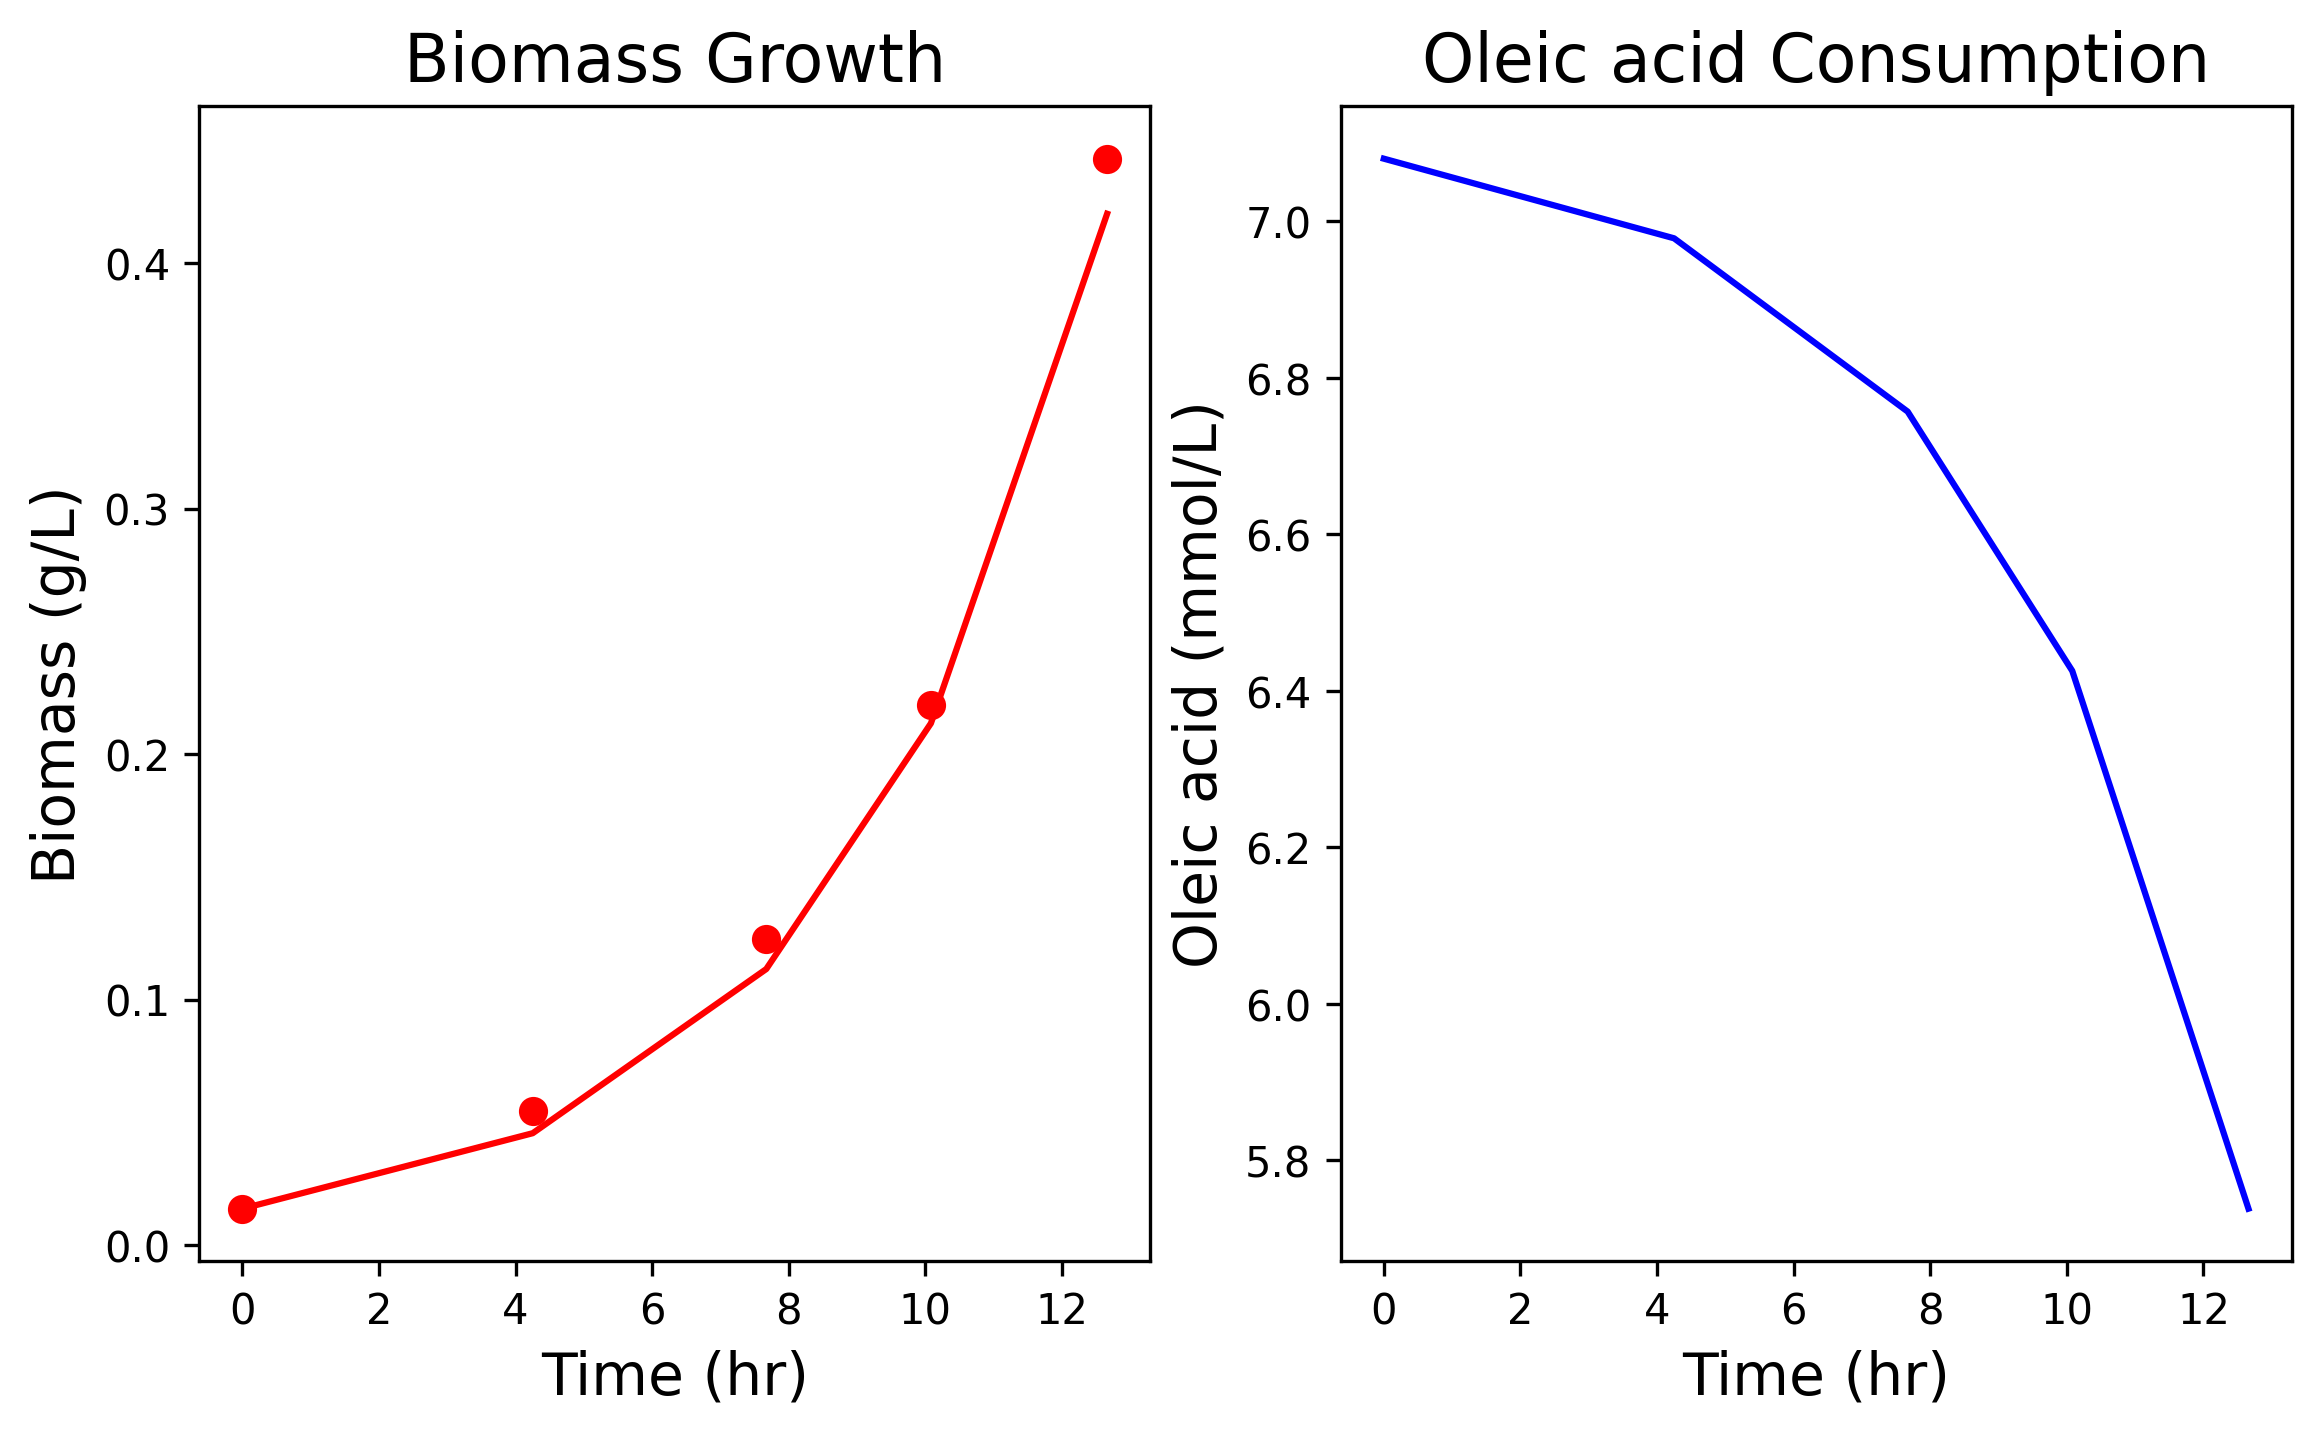

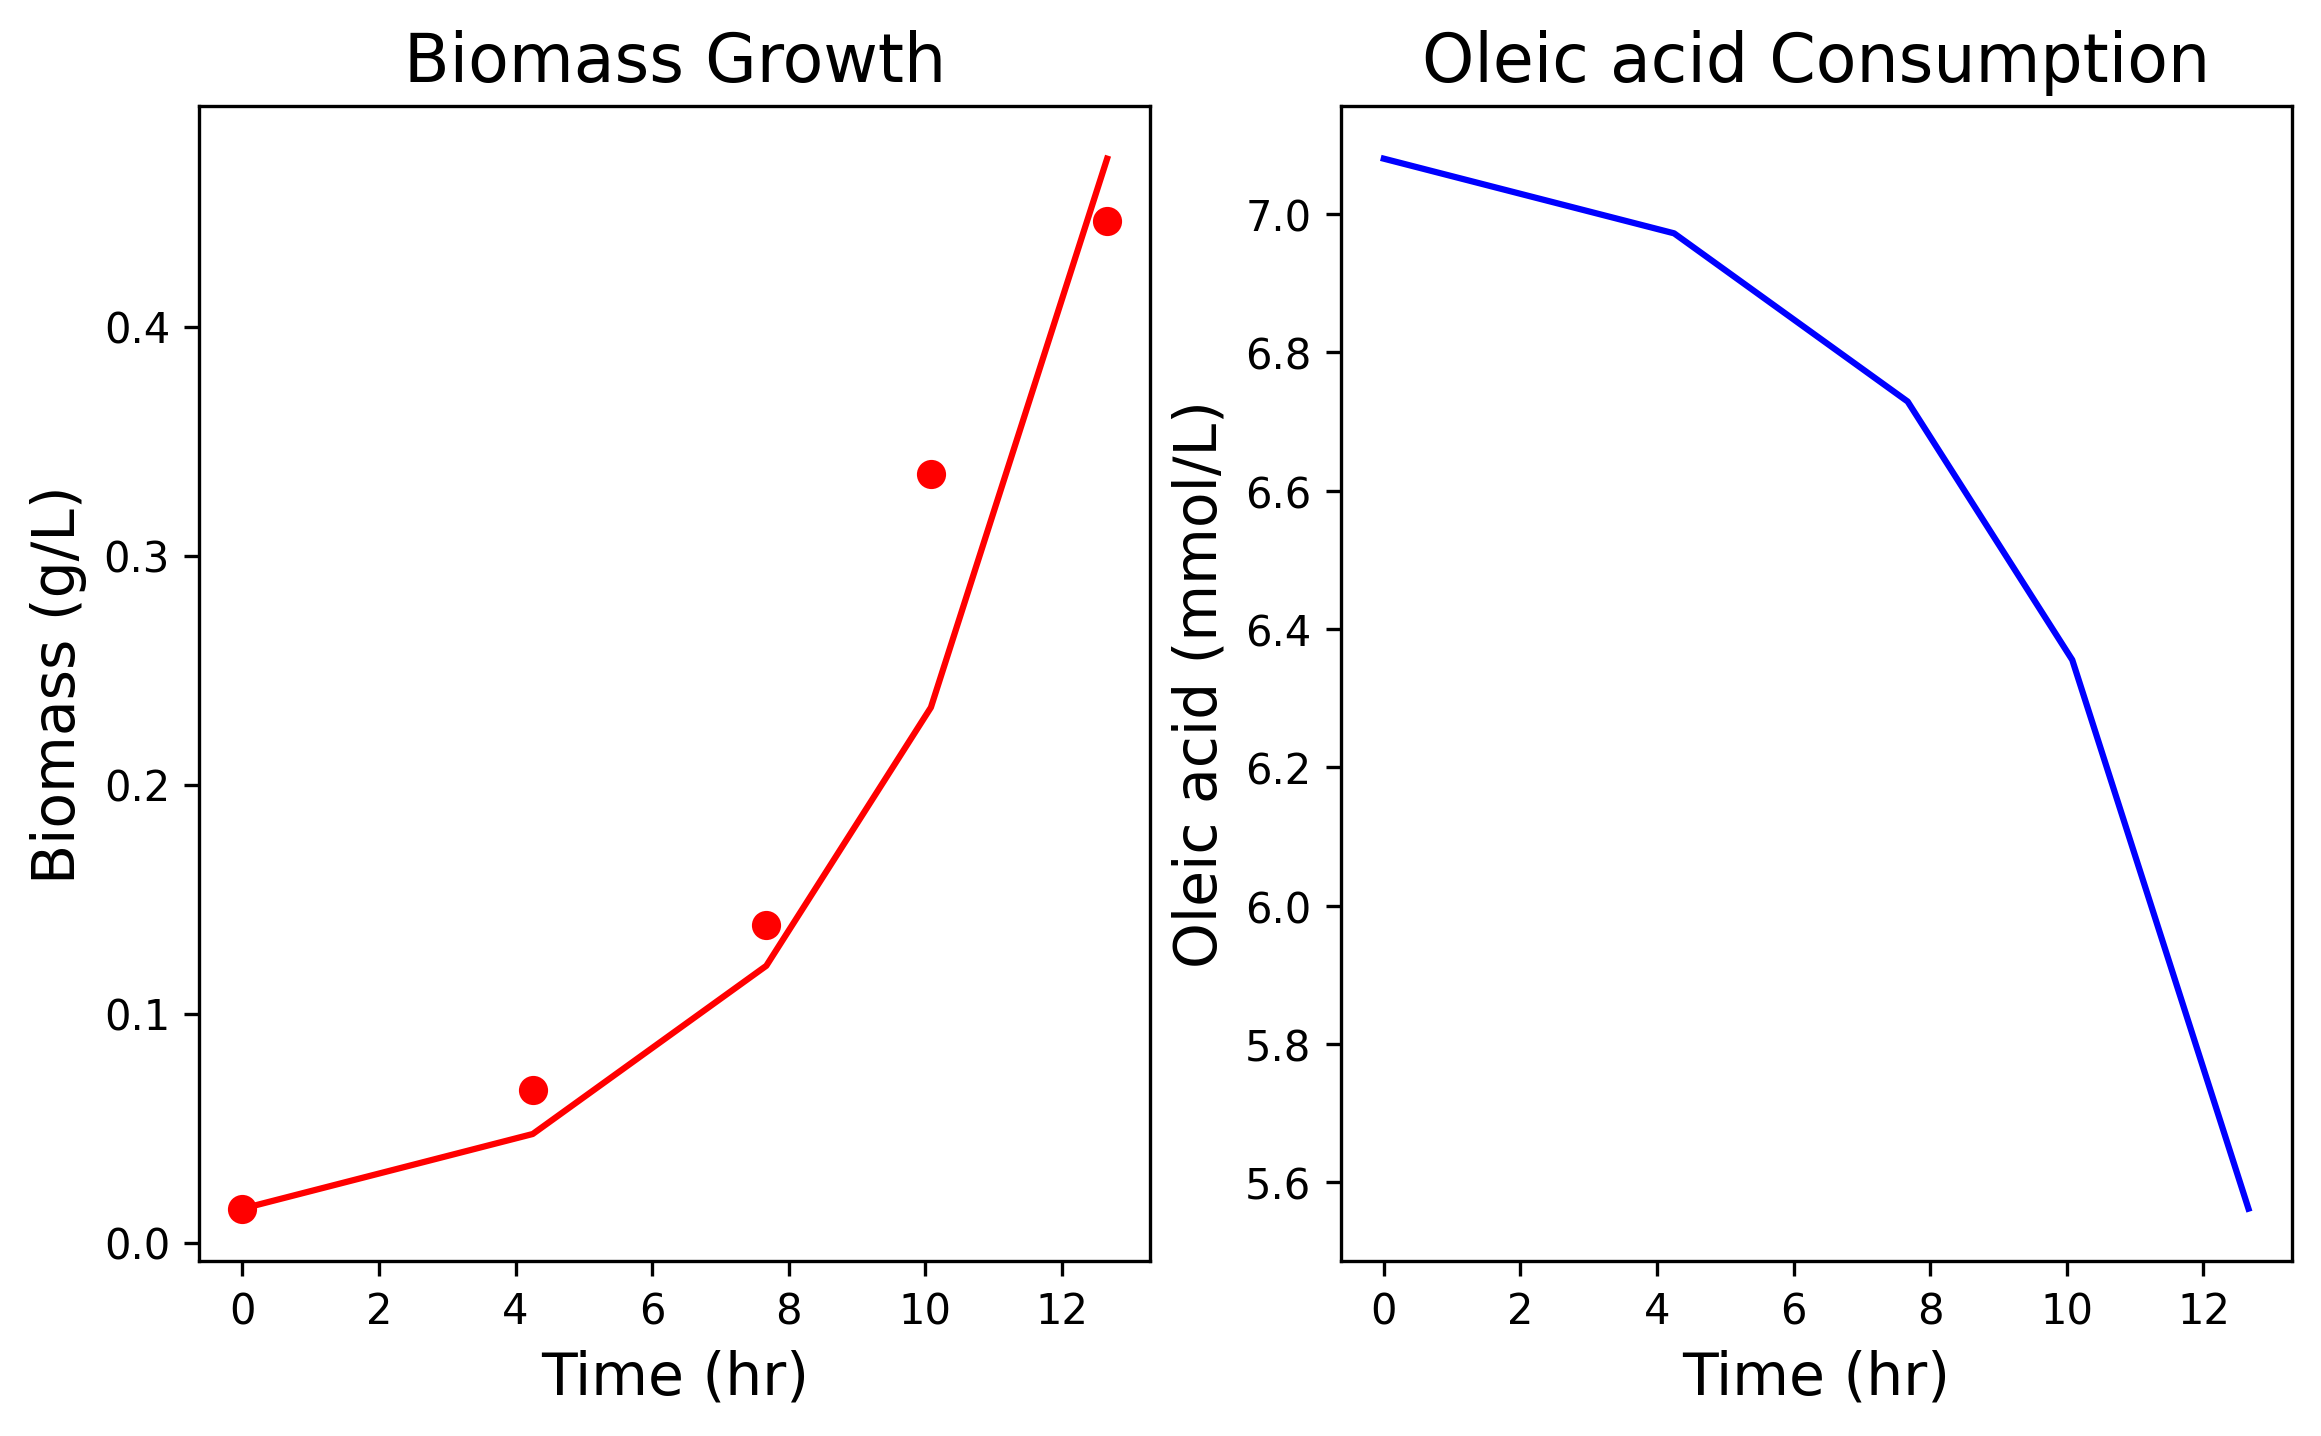

In [7]:
oleic_acid_growth_parameters = get_average_growth_parameters(growth_df=oleic_acid_growth_df, substrate='oleic_acid', molar_mass=282.46, yield_coefficient=0.302)

### Calculate oleic acid substrate uptake rate
Use the calculated growth rate, and the yield coefficient from a colony forming unit experiment (CFU)

In [8]:
# These values are based on CFU experiments
oleic_acid_growth_parameters['yield_coefficient'] = 0.302
oleic_acid_growth_parameters['yield_coefficient_std'] = 0.070

# calculate the substrate uptake rate
oleic_acid_growth_parameters['substrate_uptake_rate'] = oleic_acid_growth_parameters['growth_rate'] / oleic_acid_growth_parameters['yield_coefficient']

# calculate the standard deviation of the substrate uptake rate using propagation of uncertainty
G = oleic_acid_growth_parameters['growth_rate']  # Growth rate
sigma_G = oleic_acid_growth_parameters['growth_rate_std']  # Standard deviation of growth rate
Y = oleic_acid_growth_parameters['yield_coefficient']  # Yield coefficient
sigma_Y = oleic_acid_growth_parameters['yield_coefficient_std']  # Standard deviation of yield coefficient

# Calculate the substrate uptake rate (S) for clarity, though it might already be calculated
S = G / Y

# Calculate the standard deviation of the substrate uptake rate (sigma_S) using propagation of uncertainty
sigma_S = S * math.sqrt((sigma_G / G) ** 2 + (sigma_Y / Y) ** 2)

# Update the dictionary with the calculated standard deviation
oleic_acid_growth_parameters['substrate_uptake_rate_std'] = sigma_S


oleic_acid_growth_parameters


{'growth_rate': 0.2605550157069722,
 'growth_rate_std': 0.012321487648807482,
 'yield_coefficient': 0.302,
 'yield_coefficient_std': 0.07,
 'substrate_uptake_rate': 0.8627649526720934,
 'substrate_uptake_rate_std': 0.20409816918638934}

### Save measured biomass yields as a csv

In [9]:
# generate a dataframe of the average growth parameters
average_growth_parameters_df = pd.DataFrame({
    'glucose': glucose_growth_parameters,
    'glycerol': glycerol_growth_parameters,
    'oleic_acid': oleic_acid_growth_parameters
})

# save as a csv
average_growth_parameters_df.to_csv('../results/growth_parameters/growth_parameters.csv')

average_growth_parameters_df


,glucose,glycerol,oleic_acid
growth_rate,0.266298,0.358041,0.260555
growth_rate_std,0.003048,0.000861,0.012321
yield_coefficient,0.110433,0.058610,0.302000
yield_coefficient_std,0.003913,0.009653,0.070000
substrate_uptake_rate,2.414362,6.266590,0.862765
substrate_uptake_rate_std,0.088704,0.959634,0.204098
